In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
import os

# Update the imgag variable with the correct path
imgag = r"C:\Users\prath\Downloads\Brain\BDT\BTDS"

# Check if the specified path exists
if os.path.exists(imgag):
    print("The specified path exists.")
else:
    print("The specified path does not exist.")

# Print information about each subfolder and its images
for expression in os.listdir(imgag):
    if not expression.startswith('.'):  # Filter out hidden files (optional)
        num_images = len(os.listdir(os.path.join(imgag, expression)))
        print(expression, "folder contains\t\t", num_images, 'images')


The specified path exists.
Brain Tumor folder contains		 2513 images
Healthy folder contains		 2087 images


In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)

In [4]:
Data_gen = ImageDataGenerator(rescale = 1.0/255,validation_split = 0.2)

In [5]:
train_set = Data_gen.flow_from_directory(imgag,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 3681 images belonging to 2 classes.


In [6]:
test_set = Data_gen.flow_from_directory(imgag,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=False,
                                        class_mode = "binary",
                                        subset = "validation")

Found 919 images belonging to 2 classes.


In [7]:
train_labels = train_set.classes
test_labels = test_set.classes

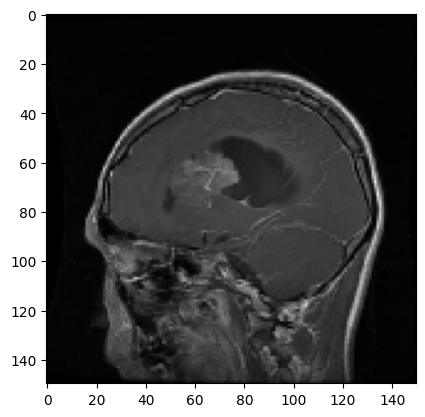

In [8]:
batch = next(train_set)

plt.imshow(batch[0][0])

In [22]:
from keras.applications import vgg16
img_size= (150,150)
vgg = vgg16.VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = img_size + (3,)
)
for layer in vgg.layers:
    layer.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               4194816   
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 19073857 (72.76 MB)
Trainable params: 43

In [29]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
epochs = 10
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs)

Epoch 1/10
58/58 [==============================] - 777s 13s/step - loss: 0.4573 - accuracy: 0.7889 - val_loss: 0.2700 - val_accuracy: 0.8836
Epoch 2/10
58/58 [==============================] - 623s 11s/step - loss: 0.1945 - accuracy: 0.9215 - val_loss: 0.1803 - val_accuracy: 0.9347
Epoch 3/10
58/58 [==============================] - 430s 7s/step - loss: 0.1147 - accuracy: 0.9576 - val_loss: 0.1041 - val_accuracy: 0.9630
Epoch 4/10
58/58 [==============================] - 518s 9s/step - loss: 0.0655 - accuracy: 0.9761 - val_loss: 0.0705 - val_accuracy: 0.9761
Epoch 5/10
58/58 [==============================] - 559s 10s/step - loss: 0.0371 - accuracy: 0.9875 - val_loss: 0.1788 - val_accuracy: 0.9271
Epoch 6/10
58/58 [==============================] - 507s 9s/step - loss: 0.0427 - accuracy: 0.9829 - val_loss: 0.0618 - val_accuracy: 0.9826
Epoch 7/10
58/58 [==============================] - 625s 11s/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0835 - val_accuracy: 0.9815
Epoch 8/1

In [30]:
train_loss, train_acc = model.evaluate(train_set)
test_loss, test_acc   = model.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 125s 8s/step - loss: 0.0505 - accuracy: 0.9902


(0.050526052713394165, 0.9902067184448242)

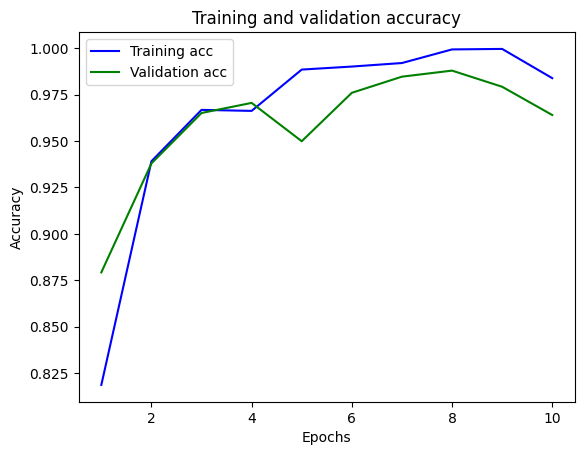

In [33]:
import matplotlib.pyplot as plt


# Get the accuracy and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs used for training
epochs = range(1, len(acc) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


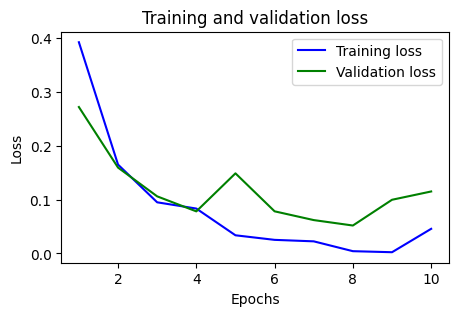

In [32]:
plt.figure(figsize=(5, 3))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
import tensorflow as tf
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications import vgg16
def build_vgg_model(hp):
    model = Sequential()
    img_size= (150,150)
    vgg = vgg16.VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = img_size + (3,)
     )
    for layer in vgg.layers:
        layer.trainable = False
    model.add(vgg)
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units_1', min_value=128, max_value=1024, step=128, default=512), activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(units=hp.Int('dense_units_2', min_value=64, max_value=512, step=64, default=256), activation=hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(units=hp.Int('dense_units_3', min_value=32, max_value=256, step=32, default=128), activation=hp.Choice('activation_3', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)
    
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [11]:
tuner = RandomSearch(
        build_vgg_model,
        objective='val_accuracy',
        max_trials=5,
        directory='tuner_directory',
        project_name='vgg_tuner'
)

INFO:tensorflow:Reloading Tuner from tuner_directory\vgg_tuner\tuner0.json


In [12]:
tuner.search(train_set, epochs=5, validation_data=test_set)

INFO:tensorflow:Oracle triggered exit


In [13]:
rs_best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [14]:
rs_best_model = build_vgg_model(rs_best_hps)

In [15]:
rs_best_model.compile(optimizer=rs_best_hps.get('optimizer'), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
rs_best_model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
58/58 [==============================] - 1190s 21s/step - loss: 0.5139 - accuracy: 0.7623 - val_loss: 0.3418 - val_accuracy: 0.8585
Epoch 2/10
58/58 [==============================] - 1341s 23s/step - loss: 0.2069 - accuracy: 0.9199 - val_loss: 0.1343 - val_accuracy: 0.9532
Epoch 3/10
58/58 [==============================] - 8963s 157s/step - loss: 0.1164 - accuracy: 0.9609 - val_loss: 0.0824 - val_accuracy: 0.9750
Epoch 4/10
58/58 [==============================] - 1327s 23s/step - loss: 0.0906 - accuracy: 0.9666 - val_loss: 0.0778 - val_accuracy: 0.9771
Epoch 5/10
58/58 [==============================] - 1365s 24s/step - loss: 0.0607 - accuracy: 0.9788 - val_loss: 0.0481 - val_accuracy: 0.9880
Epoch 6/10
58/58 [==============================] - 1213s 21s/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0893 - val_accuracy: 0.9663
Epoch 7/10
58/58 [==============================] - 48478s 850s/step - loss: 0.0651 - accuracy: 0.9769 - val_loss: 0.1118 - val_accuracy: 0.9

In [17]:
train_loss, train_acc = rs_best_model.evaluate(train_set)
test_loss, test_acc   = rs_best_model.evaluate(test_set)
test_loss, test_acc


15/15 [==============================] - 223s 15s/step - loss: 0.0949 - accuracy: 0.9706


(0.0949476808309555, 0.9706202149391174)

In [18]:
#initialize the tuner
from keras_tuner.tuners import BayesianOptimization
vg_tuner = BayesianOptimization(
        build_vgg_model,
        objective='val_accuracy',
        max_trials=5,
        num_initial_points=2,
        directory='tuner_directory',
        project_name='vgb_tuner'
)


In [19]:
vg_tuner.search(train_set, epochs=5, validation_data=test_set)

Trial 5 Complete [01h 58m 32s]
val_accuracy: 0.5473340749740601

Best val_accuracy So Far: 0.8226333260536194
Total elapsed time: 09h 27m 55s
INFO:tensorflow:Oracle triggered exit


In [20]:
bo_best_hps = vg_tuner.get_best_hyperparameters(num_trials=1)[0]
bo_best_model = build_vgg_model(bo_best_hps)
bo_best_model.compile(optimizer=bo_best_hps.get('optimizer'), loss='binary_crossentropy', metrics=['accuracy'])
bo_best_model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
58/58 [==============================] - 595s 10s/step - loss: 0.5849 - accuracy: 0.7071 - val_loss: 0.4867 - val_accuracy: 0.7617
Epoch 2/10
58/58 [==============================] - 600s 10s/step - loss: 0.4782 - accuracy: 0.7661 - val_loss: 0.4319 - val_accuracy: 0.7922
Epoch 3/10
58/58 [==============================] - 430s 7s/step - loss: 0.4281 - accuracy: 0.8006 - val_loss: 0.4008 - val_accuracy: 0.8161
Epoch 4/10
58/58 [==============================] - 328s 6s/step - loss: 0.3862 - accuracy: 0.8229 - val_loss: 0.3802 - val_accuracy: 0.8172
Epoch 5/10
58/58 [==============================] - 280s 5s/step - loss: 0.3666 - accuracy: 0.8362 - val_loss: 0.3588 - val_accuracy: 0.8346
Epoch 6/10
58/58 [==============================] - 309s 5s/step - loss: 0.3357 - accuracy: 0.8530 - val_loss: 0.3165 - val_accuracy: 0.8683
Epoch 7/10
58/58 [==============================] - 335s 6s/step - loss: 0.3006 - accuracy: 0.8680 - val_loss: 0.3539 - val_accuracy: 0.8433
Epoch 8/10


In [21]:
train_loss, train_acc = bo_best_model.evaluate(train_set)
test_loss, test_acc   = bo_best_model.evaluate(test_set)
test_loss, test_acc


15/15 [==============================] - 149s 10s/step - loss: 0.2712 - accuracy: 0.8901


(0.27119022607803345, 0.8900979161262512)

In [23]:
predictions =bo_best_model.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 151s 10s/step
0.876979293544458


In [24]:
predictions =rs_best_model.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 158s 10s/step
0.966789667896679


In [31]:
predictions =model.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 125s 8s/step
0.9892984542211654


In [32]:
from keras_tuner.tuners import Hyperband

H_tuner = Hyperband(
    build_vgg_model,
    objective='val_accuracy',
    max_epochs=10,  # Maximum number of epochs for each configuration
    factor=3,  # Reduction factor for the number of trials in each bracket
    directory='tuner1_directory',
    project_name='hyperband_vgg_tuner'
)

H_tuner.search(train_set, epochs=5, validation_data=test_set)

Trial 7 Complete [00h 13m 18s]
val_accuracy: 0.9521218538284302

Best val_accuracy So Far: 0.9521218538284302
Total elapsed time: 01h 34m 42s

Search: Running Trial #8

Value             |Best Value So Far |Hyperparameter
512               |768               |dense_units_1
relu              |tanh              |activation_1
192               |192               |dense_units_2
relu              |sigmoid           |activation_2
160               |128               |dense_units_3
relu              |tanh              |activation_3
sgd               |adam              |optimizer
0.00082825        |0.00059656        |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
52/58 [=========================>....] - ETA: 27s - loss: 0.6585 - accuracy: 0.6218

KeyboardInterrupt: 

In [34]:
from keras.applications import vgg16
img_size= (150,150)
vgg = vgg16.VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = img_size + (3,)
)
for layer in vgg.layers:
    layer.trainable = False
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model_1 = Sequential()
model_1.add(vgg)
model_1.add(Flatten())

model_1.add(Dense(768,activation='tanh'))
model_1.add(Dense(192,activation='sigmoid'))
model_1.add(Dense(128,activation='tanh'))
model_1.add(Dense(1,activation='sigmoid'))
model_1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 768)               6292224   
                                                                 
 dense_5 (Dense)             (None, 192)               147648    
                                                                 
 dense_6 (Dense)             (None, 128)               24704     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21179393 (80.79 MB)
Trainable params: 64

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00059656)
model_1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
epochs = 10
history_2 = model_1.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 434s 7s/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0442 - val_accuracy: 0.9891
Epoch 2/10
58/58 [==============================] - 419s 7s/step - loss: 0.0249 - accuracy: 0.9908 - val_loss: 0.0563 - val_accuracy: 0.9848
Epoch 3/10
58/58 [==============================] - 420s 7s/step - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.0560 - val_accuracy: 0.9869
Epoch 4/10
58/58 [==============================] - 421s 7s/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0606 - val_accuracy: 0.9859
Epoch 5/10
58/58 [==============================] - 421s 7s/step - loss: 5.3676e-04 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9913
Epoch 6/10
58/58 [==============================] - 420s 7s/step - loss: 2.4866e-04 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9913
Epoch 7/10
58/58 [==============================] - 436s 8s/step - loss: 2.0175e-04 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9913
E

In [39]:
train_loss, train_acc = model_1.evaluate(train_set)
test_loss, test_acc   = model_1.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 84s 6s/step - loss: 0.0432 - accuracy: 0.9924


(0.04317288473248482, 0.9923830032348633)

In [40]:
predictions =model_1.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 84s 6s/step
0.9916765755053507


In [41]:
from keras.applications import vgg16
img_size= (150,150)
vgg = vgg16.VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = img_size + (3,)
)
for layer in vgg.layers:
    layer.trainable = False
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model_2 = Sequential()
model_2.add(vgg)
model_2.add(Flatten())

model_2.add(Dense(1024,activation='selu'))
model_2.add(Dense(512,activation='selu'))
model_2.add(Dense(128,activation='selu'))
model_2.add(Dense(1,activation='sigmoid'))
model_2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              8389632   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 128)               65664     
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 23694913 (90.39 MB)
Trainable params: 89

In [42]:
optimizer = tf.keras.optimizers.Adagrad()
model_2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
epochs = 10
history_3 = model_2.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 281s 5s/step - loss: 0.7074 - accuracy: 0.7123 - val_loss: 0.6780 - val_accuracy: 0.6376
Epoch 2/10
58/58 [==============================] - 256s 4s/step - loss: 0.3952 - accuracy: 0.8207 - val_loss: 0.3872 - val_accuracy: 0.8161
Epoch 3/10
58/58 [==============================] - 278s 5s/step - loss: 0.3697 - accuracy: 0.8384 - val_loss: 0.3967 - val_accuracy: 0.8183
Epoch 4/10
58/58 [==============================] - 281s 5s/step - loss: 0.3090 - accuracy: 0.8693 - val_loss: 0.3253 - val_accuracy: 0.8542
Epoch 5/10
58/58 [==============================] - 265s 5s/step - loss: 0.2958 - accuracy: 0.8729 - val_loss: 0.3226 - val_accuracy: 0.8651
Epoch 6/10
58/58 [==============================] - 272s 5s/step - loss: 0.2587 - accuracy: 0.8965 - val_loss: 0.2754 - val_accuracy: 0.8977
Epoch 7/10
58/58 [==============================] - 267s 5s/step - loss: 0.2457 - accuracy: 0.9057 - val_loss: 0.2911 - val_accuracy: 0.8672
Epoch 8/10
58

In [44]:
train_loss, train_acc = model_2.evaluate(train_set)
test_loss, test_acc   = model_2.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 57s 4s/step - loss: 0.2187 - accuracy: 0.9173


(0.2187104970216751, 0.9173014163970947)

In [45]:
predictions =model_2.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 56s 4s/step
0.9103773584905661


In [46]:
from keras.applications import vgg16
img_size= (150,150)
vgg = vgg16.VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = img_size + (3,)
)
for layer in vgg.layers:
    layer.trainable = False
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model_3 = Sequential()
model_3.add(vgg)
model_3.add(Flatten())

model_3.add(Dense(1024,activation='selu'))
model_3.add(Dense(512,activation='selu'))
model_3.add(Dense(128,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))
model_3.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              8389632   
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dense_18 (Dense)            (None, 128)               65664     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 23694913 (90.39 MB)
Trainable params: 89

In [47]:
optimizer = tf.keras.optimizers.Adam()
model_3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
epochs = 10
history_4 = model_3.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 265s 5s/step - loss: 0.7459 - accuracy: 0.7764 - val_loss: 0.2687 - val_accuracy: 0.8988
Epoch 2/10
58/58 [==============================] - 265s 5s/step - loss: 0.2317 - accuracy: 0.9084 - val_loss: 0.1506 - val_accuracy: 0.9391
Epoch 3/10
58/58 [==============================] - 295s 5s/step - loss: 0.1195 - accuracy: 0.9563 - val_loss: 0.1459 - val_accuracy: 0.9380
Epoch 4/10
58/58 [==============================] - 280s 5s/step - loss: 0.0685 - accuracy: 0.9753 - val_loss: 0.0920 - val_accuracy: 0.9695
Epoch 5/10
58/58 [==============================] - 269s 5s/step - loss: 0.0774 - accuracy: 0.9701 - val_loss: 0.0845 - val_accuracy: 0.9684
Epoch 6/10
58/58 [==============================] - 263s 5s/step - loss: 0.0828 - accuracy: 0.9685 - val_loss: 0.0529 - val_accuracy: 0.9859
Epoch 7/10
58/58 [==============================] - 273s 5s/step - loss: 0.0170 - accuracy: 0.9948 - val_loss: 0.0428 - val_accuracy: 0.9891
Epoch 8/10
58

In [49]:
train_loss, train_acc = model_3.evaluate(train_set)
test_loss, test_acc   = model_3.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 49s 3s/step - loss: 0.0924 - accuracy: 0.9750


(0.09236855804920197, 0.9749727845191956)

In [50]:
predictions =model_3.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 48s 3s/step
0.9731621936989499


In [51]:
vg_tuner.results_summary()

Results summary
Results in tuner_directory\vgb_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
dense_units_1: 896
activation_1: tanh
dense_units_2: 192
activation_2: relu
dense_units_3: 224
activation_3: tanh
optimizer: sgd
learning_rate: 0.0049293926188388095
Score: 0.8226333260536194

Trial 1 summary
Hyperparameters:
dense_units_1: 640
activation_1: tanh
dense_units_2: 128
activation_2: tanh
dense_units_3: 160
activation_3: relu
optimizer: rmsprop
learning_rate: 0.0021779168728807245
Score: 0.7442872524261475

Trial 4 summary
Hyperparameters:
dense_units_1: 896
activation_1: sigmoid
dense_units_2: 192
activation_2: relu
dense_units_3: 256
activation_3: tanh
optimizer: sgd
learning_rate: 0.00014011647509329906
Score: 0.5473340749740601

Trial 2 summary
Hyperparameters:
dense_units_1: 384
activation_1: relu
dense_units_2: 64
activation_2: sigmoid
dense_units_3: 256
activation_3: relu
optimizer: sgd
learning_rate: 0.00015664

In [53]:
tuner.results_summary()

Results summary
Results in tuner_directory\vgg_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
dense_units_1: 512
activation_1: relu
dense_units_2: 320
activation_2: tanh
dense_units_3: 160
activation_3: tanh
optimizer: adam
learning_rate: 0.0002452567376517019
Score: 0.9880304932594299

Trial 4 summary
Hyperparameters:
dense_units_1: 256
activation_1: sigmoid
dense_units_2: 192
activation_2: tanh
dense_units_3: 160
activation_3: relu
optimizer: adam
learning_rate: 0.0005003075401210207
Score: 0.9771490693092346

Trial 1 summary
Hyperparameters:
dense_units_1: 768
activation_1: relu
dense_units_2: 64
activation_2: sigmoid
dense_units_3: 32
activation_3: tanh
optimizer: rmsprop
learning_rate: 0.0007443190353728441
Score: 0.9194777011871338

Trial 2 summary
Hyperparameters:
dense_units_1: 384
activation_1: relu
dense_units_2: 192
activation_2: relu
dense_units_3: 128
activation_3: tanh
optimizer: sgd
learning_rate: 0.00014446